In [1]:
import os
import csv
import sys

In [2]:
def read_csv(csv_path):
    LABEL_CLICKABLE = 'clickable'
    clickable_path = os.path.join(csv_path, LABEL_CLICKABLE)
    path_list = [clickable_path]
    for path in path_list:
        for csv in os.scandir(path):
            if csv.is_file() and csv.path.endswith('.csv'):
                if path == clickable_path:
                    yield csv.path

In [3]:
def parse_csv(csv_name):
    firstline = True
    with open(csv_name, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            if firstline:
                firstline = False
                continue
            yield row[1:5]

In [4]:
clicklist = []
for path in read_csv('./dataset/01-csv'):
    for p in parse_csv(path):
        clicklist.append({'x1':int(p[0]), 'y1':int(p[1]),'x2':int(p[2]), 'y2':int(p[3])})

In [5]:
import pandas as pd
import numpy as np
pdf = pd.DataFrame.from_dict(clicklist)
pdf

,x1,y1,x2,y2
0,0,96,252,316
1,584,160,855,251
2,1230,96,1440,316
3,0,316,1440,2900
4,584,584,860,864
...,...,...,...,...
103520,0,2692,288,2900
103521,288,2692,576,2900
103522,576,2692,864,2900
103523,864,2692,1152,2900


In [6]:
pdf['xlen'] = np.abs(pdf['x2'] - pdf['x1'])
pdf['ylen'] = np.abs(pdf['y2'] - pdf['y1'])
pdf = pdf[pdf['xlen'] < 1000]
pdf = pdf[pdf['xlen'] > 5]

pdf = pdf[pdf['ylen'] < 2000]
pdf = pdf[pdf['ylen'] > 5]

rdf = pdf.reset_index()
df = rdf.drop('index', axis=1)
df.median()

x1       608.0
y1      1293.0
x2       936.0
y2      1554.0
xlen     224.0
ylen     192.0
dtype: float64

In [7]:
sxpdf = df.sort_values('xlen').reset_index()

xpdf = sxpdf.drop('index', axis=1)

sypdf = df.sort_values('ylen').reset_index()
ypdf = sypdf.drop('index', axis=1)
sypdf.median()

index    26323.5
x1         608.0
y1        1293.0
x2         936.0
y2        1554.0
xlen       224.0
ylen       192.0
dtype: float64

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


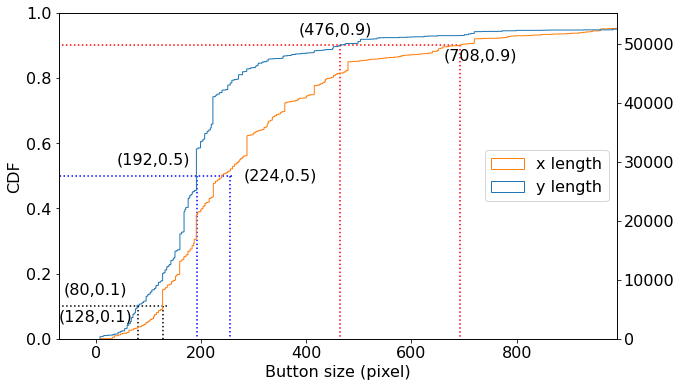

In [22]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,6]
font = {
        'size'   : 16}

plt.rc('font', **font)
fig, ax = plt.subplots()
ax2 = ax.twinx()

n, bins, patches = ax2.hist(
    xpdf['xlen'], cumulative=1, histtype='step', bins=1000, color='tab:orange', label='x length')
n, bins, patches = ax2.hist(
    ypdf['ylen'], cumulative=1, histtype='step', bins=1000, color='tab:blue', label='y length')



ax.axhline(0.9,\
           xpdf['xlen'].loc[int(len(xpdf)*0.95)]/xpdf['xlen'].max(),0, 
           color='red', linestyle='dotted')
ax.axvline(xpdf['xlen'].loc[int(len(xpdf)*0.945)],
           0.9,0, color='red', linestyle='dotted')


#ax.axhline(0.9,\
#           ypdf['ylen'].loc[int(len(xpdf)*0.96)]/xpdf['xlen'].max(),0, 
#           color='red', linestyle='dotted')
ax.axvline(ypdf['ylen'].loc[int(len(ypdf)*0.945)],
           0.9,0, color='red', linestyle='dotted')


ax.text(455,0.95, "(%s,%s)" % (476,0.9), ha='center', va='center')
ax.text(730,0.87, "(%s,%s)" % (708,0.9), ha='center', va='center')



#ax.axhline(0.5,\
#           xpdf['xlen'].loc[int(len(xpdf)*0.55)]/xpdf['xlen'].max(),0, 
#           color='blue', linestyle='dotted')
ax.axvline(xpdf['xlen'].loc[int(len(xpdf)*0.545)],
           0.5,0, color='blue', linestyle='dotted')


ax.axhline(0.5,\
           ypdf['ylen'].loc[int(len(xpdf)*0.88)]/xpdf['xlen'].max(),0, 
           color='blue', linestyle='dotted')
ax.axvline(ypdf['ylen'].loc[int(len(ypdf)*0.5)],
           0.5,0, color='blue', linestyle='dotted')


ax.text(110,0.55, "(%s,%s)" % (192,0.5), ha='center', va='center')
ax.text(350,0.50, "(%s,%s)" % (224,0.5), ha='center', va='center')




ax.axhline(0.1,\
           xpdf['xlen'].loc[int(len(xpdf)*0.4)]/xpdf['xlen'].max(),0, 
           color='black', linestyle='dotted')
ax.axvline(xpdf['xlen'].loc[int(len(xpdf)*0.145)],
           0.1,0, color='black', linestyle='dotted')


#ax.axhline(0.1,\
#           ypdf['ylen'].loc[int(len(xpdf)*0.16)]/xpdf['xlen'].max(),0, 
#           color='black', linestyle='dotted')
ax.axvline(ypdf['ylen'].loc[int(len(ypdf)*0.1)],
           0.1,0, color='black', linestyle='dotted')


ax.text(0,0.15, "(%s,%s)" % (80,0.1), ha='center', va='center')
ax.text(0,0.07, "(%s,%s)" % (128,0.1), ha='center', va='center')





ax2.set_xlim(ax.get_xlim()[0], pdf['xlen'].max()-2)
ax2.legend(loc='right')
#ax2.set_title('버튼 크기 분포')
ax.set_xlabel('Button size (pixel)')
ax.set_ylabel('CDF')
plt.savefig(f"/home/kimsoohyun/00-Research/02-Graph/01-tapsterbot/click-accuracy/dataset/05-figure/200713/buttonsize.png")


In [44]:
ypdf['ylen'].loc[int(len(ypdf)*0.5)]
#xpdf['xlen'].loc[int(len(xpdf)*0.6)]

192

In [115]:

ypdf['ylen'].loc[int(len(ypdf)*0.95)]

476

In [177]:
#버튼 위치 분포

In [47]:
ddf = df.drop(['xlen', 'ylen'],axis=1).reset_index()
ldf = ddf.drop('index',axis=1)
ldf['xloc'] = (ldf['x1']+ldf['x2'])/2
ldf['yloc'] = (ldf['y1']+ldf['y2'])/2

In [140]:
ldf['x1ch'] = ldf['x1']/1440 * 54 #- 28
ldf['x1ch'] = ldf['x1ch'].astype(int)

ldf['x2ch'] = ldf['x2']/1440 * 54 #- 28
ldf['x2ch'] = ldf['x2ch'].astype(int)

ldf['y1ch'] = ldf['y1']/2960 * 120 #- 60
ldf['y1ch'] = ldf['y1ch'].astype(int)

ldf['y2ch'] = ldf['y2']/2960 * 120 #- 60
ldf['y2ch'] = ldf['y2ch'].astype(int)

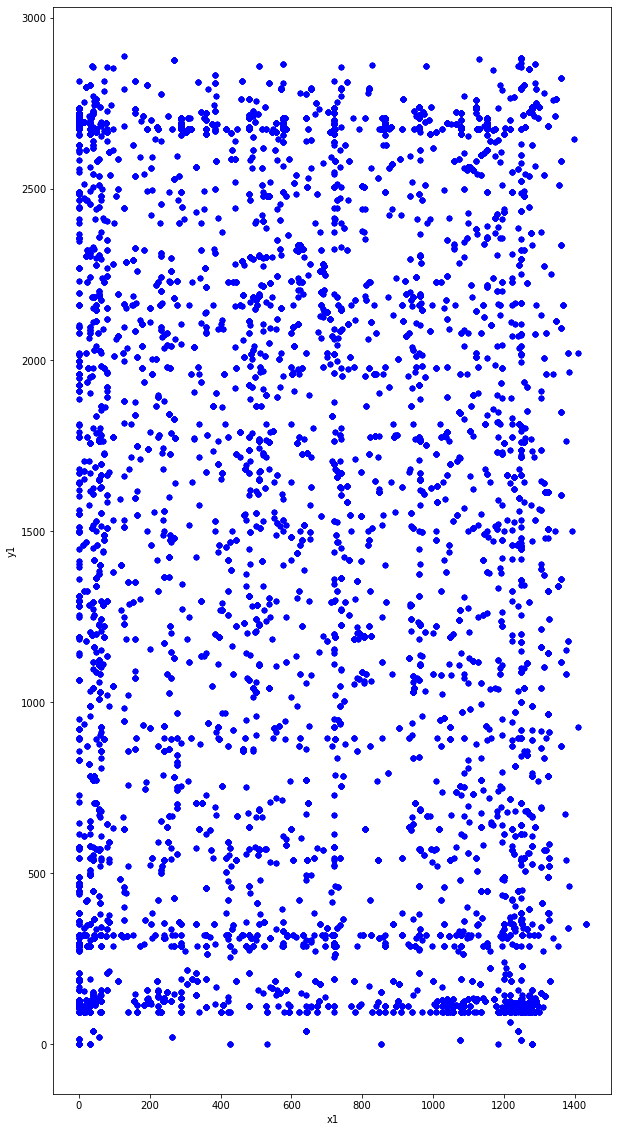

In [211]:
plt.rcParams["figure.figsize"] = (10,20)
plt.rcParams['axes.grid'] = False
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.facecolor"] = 'white'



ax1 = ldf.plot.scatter(x='x1',
                      y='y1',
                      c='Blue')

In [212]:
import seaborn as sns
import numpy as np
loc = np.zeros((120+1,54+1))
df = ldf[['x1ch','y1ch','x2ch','y2ch']]
for i in range(len(df)):
    xloc1 = int(df.loc[i]['x1ch'])
    yloc1 = int(df.loc[i]['y1ch'])

    xloc2 = int(df.loc[i]['x2ch'])
    yloc2 = int(df.loc[i]['y2ch'])
    #loc[yloc][xloc] += 1
    for i in range(yloc1, yloc2):
        for j in range(xloc1, xloc2):
            loc[i][j] += 1
    print(xloc,yloc,loc[yloc][xloc])

20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0

20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0
20 -56 0.0

20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0
20 -56 6.0

20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 7.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 8.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0
20 -56 9.0

20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 25.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 26.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -56 27.0
20 -

20 -56 46.0
20 -56 46.0
20 -56 46.0
20 -56 46.0
20 -56 46.0
20 -56 46.0
20 -56 46.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 47.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 48.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 49.0
20 -56 50.0
20 -56 50.0
20 -56 50.0
20 -56 50.0
20 -56 50.0
20 -56 50.0
20 -

20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 77.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 78.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 79.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 80.0
20 -56 81.0
20 -56 81.0
20 -56 81.0
20 -56 81.0
20 -56 81.0
20 -56 81.0
20 -56 81.0
20 -56 81.0
20 -

20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -

20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -

20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -56 99.0
20 -

20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0
20 -56 102.0

20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0

20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0
20 -56 106.0

20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0
20 -56 111.0

20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 141.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 142.0
20 -56 143.0
20 -56 143.0
20 -56 143.0
20 -56 143.0
20 -56 143.0
20 -56 143.0
20 -56 143.0
20 -56 143.0
20 -56 143.0
20 -56 143.0
20 -56 143.0
20 -56 144.0
20 -56 144.0
20 -56 144.0
20 -56 144.0
20 -56 144.0
20 -56 144.0
20 -56 144.0
20 -56 144.0
20 -56 144.0
20 -56 144.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 145.0
20 -56 146.0
20 -56 146.0
20 -56 146.0
20 -56 146.0
20 -56 146.0
20 -56 146.0
20 -56 146.0
20 -56 146.0
20 -56 146.0
20 -56 146.0
20 -56 146.0

20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 177.0
20 -56 178.0
20 -56 178.0
20 -56 178.0
20 -56 178.0
20 -56 178.0
20 -56 178.0
20 -56 178.0
20 -56 178.0
20 -56 178.0
20 -56 178.0
20 -56 178.0
20 -56 179.0
20 -56 179.0
20 -56 179.0
20 -56 179.0
20 -56 179.0
20 -56 179.0
20 -56 179.0
20 -56 179.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0
20 -56 180.0

20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0

20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 204.0
20 -56 205.0
20 -56 205.0
20 -56 205.0
20 -56 205.0
20 -56 205.0
20 -56 205.0
20 -56 205.0
20 -56 205.0
20 -56 205.0
20 -56 205.0
20 -56 205.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 206.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 207.0
20 -56 208.0
20 -56 208.0

20 -56 227.0
20 -56 227.0
20 -56 227.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 228.0
20 -56 229.0
20 -56 229.0
20 -56 229.0
20 -56 229.0
20 -56 229.0
20 -56 229.0
20 -56 229.0
20 -56 229.0
20 -56 229.0
20 -56 229.0
20 -56 229.0
20 -56 230.0
20 -56 230.0
20 -56 230.0
20 -56 230.0

20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0

20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0
20 -56 232.0

20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 248.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0
20 -56 249.0

20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 259.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0
20 -56 260.0

20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 270.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0
20 -56 271.0

20 -56 285.0
20 -56 285.0
20 -56 285.0
20 -56 285.0
20 -56 285.0
20 -56 285.0
20 -56 285.0
20 -56 285.0
20 -56 286.0
20 -56 286.0
20 -56 286.0
20 -56 286.0
20 -56 286.0
20 -56 286.0
20 -56 286.0
20 -56 286.0
20 -56 286.0
20 -56 286.0
20 -56 286.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 287.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 288.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 289.0
20 -56 290.0
20 -56 290.0
20 -56 290.0
20 -56 290.0
20 -56 290.0
20 -56 290.0

20 -56 327.0
20 -56 327.0
20 -56 327.0
20 -56 327.0
20 -56 327.0
20 -56 327.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 328.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 329.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0
20 -56 330.0

20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 337.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 338.0
20 -56 339.0
20 -56 339.0
20 -56 339.0
20 -56 339.0

20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0
20 -56 351.0

20 -56 365.0
20 -56 365.0
20 -56 365.0
20 -56 365.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 366.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 367.0
20 -56 368.0
20 -56 368.0
20 -56 368.0
20 -56 368.0
20 -56 368.0
20 -56 368.0
20 -56 368.0
20 -56 368.0

20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0
20 -56 372.0

20 -56 379.0
20 -56 379.0
20 -56 379.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 380.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0
20 -56 381.0

20 -56 398.0
20 -56 398.0
20 -56 398.0
20 -56 398.0
20 -56 398.0
20 -56 398.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 399.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0
20 -56 400.0

20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 415.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0
20 -56 416.0

20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0

20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0

20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0

20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0

20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0
20 -56 421.0

20 -56 449.0
20 -56 449.0
20 -56 450.0
20 -56 450.0
20 -56 450.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 451.0
20 -56 452.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 453.0
20 -56 454.0
20 -56 454.0
20 -56 454.0
20 -56 455.0
20 -56 455.0
20 -56 455.0
20 -56 456.0
20 -56 456.0
20 -56 456.0
20 -56 457.0
20 -56 457.0
20 -56 457.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 458.0
20 -56 459.0
20 -56 460.0
20 -56 460.0
20 -56 460.0
20 -56 460.0
20 -56 460.0
20 -56 460.0
20 -56 460.0
20 -56 460.0
20 -56 460.0

20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0
20 -56 479.0

20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0
20 -56 484.0

20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0

20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0

20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0
20 -56 491.0

20 -56 492.0
20 -56 492.0
20 -56 492.0
20 -56 492.0
20 -56 492.0
20 -56 492.0
20 -56 492.0
20 -56 492.0
20 -56 492.0
20 -56 492.0
20 -56 492.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0
20 -56 493.0

20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 498.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 499.0
20 -56 500.0
20 -56 500.0
20 -56 500.0
20 -56 500.0
20 -56 500.0
20 -56 500.0
20 -56 501.0
20 -56 501.0
20 -56 501.0
20 -56 501.0
20 -56 501.0
20 -56 501.0
20 -56 501.0
20 -56 501.0

20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 539.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0

20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0
20 -56 540.0

20 -56 541.0
20 -56 542.0
20 -56 542.0
20 -56 542.0
20 -56 542.0
20 -56 542.0
20 -56 542.0
20 -56 542.0
20 -56 542.0
20 -56 542.0
20 -56 542.0
20 -56 542.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 543.0
20 -56 544.0
20 -56 544.0
20 -56 544.0
20 -56 544.0
20 -56 544.0
20 -56 544.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 545.0
20 -56 546.0
20 -56 546.0
20 -56 546.0
20 -56 546.0
20 -56 546.0
20 -56 546.0
20 -56 546.0
20 -56 546.0
20 -56 546.0
20 -56 546.0
20 -56 546.0
20 -56 547.0
20 -56 547.0
20 -56 547.0
20 -56 547.0
20 -56 547.0
20 -56 547.0
20 -56 547.0
20 -56 547.0
20 -56 547.0
20 -56 547.0
20 -56 547.0
20 -56 547.0

20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0

20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0
20 -56 568.0

20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 574.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0

20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0

20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0

20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0

20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0
20 -56 575.0

20 -56 579.0
20 -56 579.0
20 -56 579.0
20 -56 579.0
20 -56 579.0
20 -56 579.0
20 -56 579.0
20 -56 579.0
20 -56 579.0
20 -56 579.0
20 -56 579.0
20 -56 580.0
20 -56 580.0
20 -56 580.0
20 -56 581.0
20 -56 581.0
20 -56 581.0
20 -56 581.0
20 -56 581.0
20 -56 581.0
20 -56 581.0
20 -56 581.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 582.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 583.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0
20 -56 584.0

20 -56 620.0
20 -56 620.0
20 -56 620.0
20 -56 620.0
20 -56 620.0
20 -56 620.0
20 -56 620.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 621.0
20 -56 622.0
20 -56 622.0
20 -56 622.0
20 -56 623.0
20 -56 623.0
20 -56 623.0
20 -56 623.0
20 -56 623.0
20 -56 623.0
20 -56 623.0
20 -56 623.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0

20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0

20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0
20 -56 624.0

20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 634.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0
20 -56 635.0

20 -56 676.0
20 -56 676.0
20 -56 677.0
20 -56 677.0
20 -56 677.0
20 -56 677.0
20 -56 677.0
20 -56 678.0
20 -56 678.0
20 -56 678.0
20 -56 678.0
20 -56 678.0
20 -56 678.0
20 -56 678.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 679.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 680.0
20 -56 681.0
20 -56 681.0
20 -56 681.0
20 -56 681.0
20 -56 681.0
20 -56 681.0
20 -56 681.0
20 -56 681.0
20 -56 681.0
20 -56 681.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 682.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 683.0
20 -56 684.0
20 -56 684.0

20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0

20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0

20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0
20 -56 736.0

20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 738.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0
20 -56 739.0

20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0

20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0
20 -56 743.0

20 -56 766.0
20 -56 766.0
20 -56 766.0
20 -56 766.0
20 -56 766.0
20 -56 766.0
20 -56 766.0
20 -56 766.0
20 -56 766.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 767.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 768.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 769.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0
20 -56 770.0

20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0

20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0

20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0

20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0

20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0
20 -56 799.0

20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 817.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 818.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0
20 -56 819.0

20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 841.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 842.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0
20 -56 843.0

[Text(0, 0, '-60'),
 Text(0, 0, '-59'),
 Text(0, 0, '-58'),
 Text(0, 0, '-57'),
 Text(0, 0, '-56'),
 Text(0, 0, '-55'),
 Text(0, 0, '-54'),
 Text(0, 0, '-53'),
 Text(0, 0, '-52'),
 Text(0, 0, '-51'),
 Text(0, 0, '-50'),
 Text(0, 0, '-49'),
 Text(0, 0, '-48'),
 Text(0, 0, '-47'),
 Text(0, 0, '-46'),
 Text(0, 0, '-45'),
 Text(0, 0, '-44'),
 Text(0, 0, '-43'),
 Text(0, 0, '-42'),
 Text(0, 0, '-41'),
 Text(0, 0, '-40'),
 Text(0, 0, '-39'),
 Text(0, 0, '-38'),
 Text(0, 0, '-37'),
 Text(0, 0, '-36'),
 Text(0, 0, '-35'),
 Text(0, 0, '-34'),
 Text(0, 0, '-33'),
 Text(0, 0, '-32'),
 Text(0, 0, '-31'),
 Text(0, 0, '-30'),
 Text(0, 0, '-29'),
 Text(0, 0, '-28'),
 Text(0, 0, '-27'),
 Text(0, 0, '-26'),
 Text(0, 0, '-25'),
 Text(0, 0, '-24'),
 Text(0, 0, '-23'),
 Text(0, 0, '-22'),
 Text(0, 0, '-21'),
 Text(0, 0, '-20'),
 Text(0, 0, '-19'),
 Text(0, 0, '-18'),
 Text(0, 0, '-17'),
 Text(0, 0, '-16'),
 Text(0, 0, '-15'),
 Text(0, 0, '-14'),
 Text(0, 0, '-13'),
 Text(0, 0, '-12'),
 Text(0, 0, '-11'),


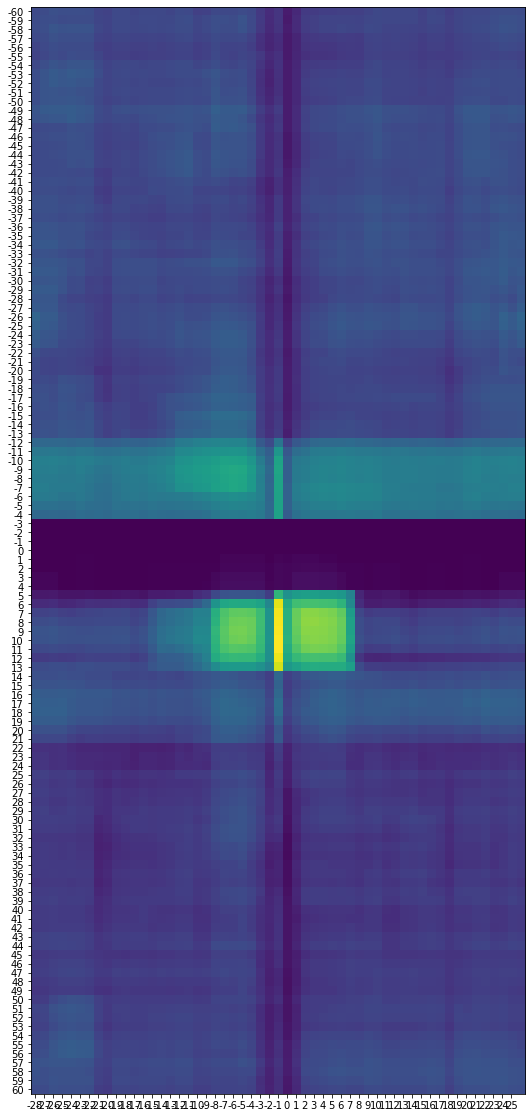

In [213]:
fig, ax = plt.subplots()
im = ax.imshow(loc)

xlabel = list(range(54))
ylabel = list(range(121))

count = -28
for i in np.arange(0, len(xlabel)):
    xlabel[i] = str(count)
    count += 1
count = -60
for i in range(0, len(ylabel)):
    ylabel[i] = str(count)
    count += 1
    
ax.set_xticks(np.arange(len(xlabel)))
ax.set_yticks(np.arange(len(ylabel)))

ax.set_xticklabels(xlabel)
ax.set_yticklabels(ylabel)

Text(69.0, 0.5, 'y axis')

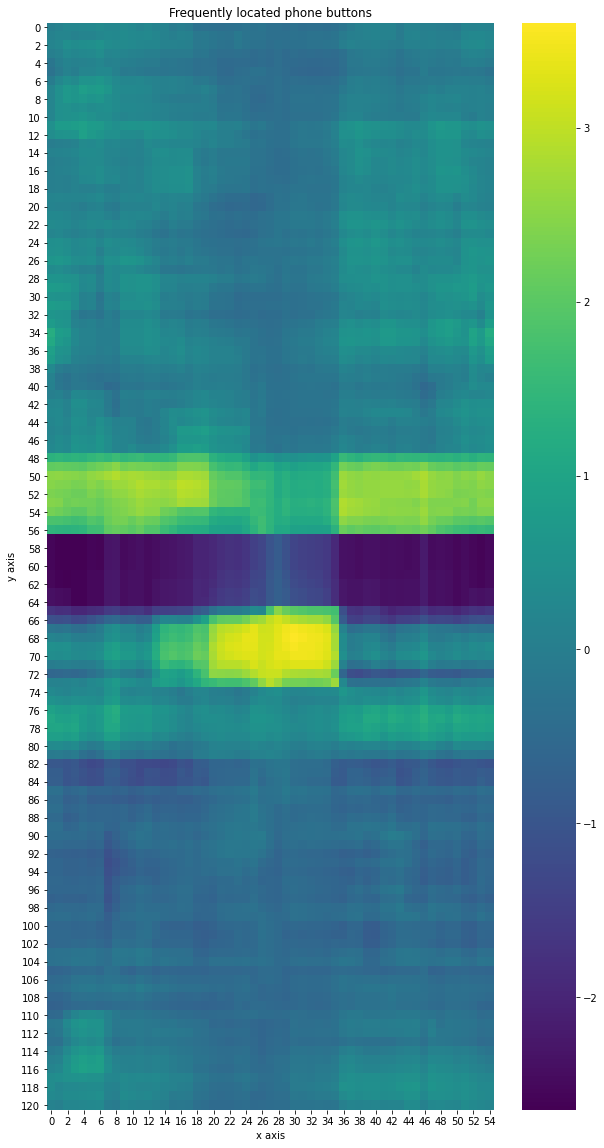

In [216]:
df = pd.DataFrame(loc)
df_norm_col=(df-df.mean())/df.std()
ax = sns.heatmap(df_norm_col,cmap='viridis')
ax.set_title('Frequently located phone buttons')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')

In [205]:
len(df)

121

In [201]:
df.loc[65]

0        7.0
1        0.0
2       14.0
3        0.0
4       49.0
5       14.0
6       14.0
7       14.0
8       14.0
9        7.0
10      14.0
11      14.0
12      70.0
13      84.0
14      49.0
15      14.0
16      21.0
17       0.0
18     161.0
19     154.0
20     308.0
21     147.0
22      63.0
23       0.0
24       0.0
25       0.0
26       0.0
27    1848.0
28      84.0
29      77.0
30      49.0
31       0.0
32       0.0
33      14.0
34      35.0
35       0.0
36      14.0
37      56.0
38       0.0
39      28.0
40       0.0
41       7.0
42       0.0
43      42.0
44      28.0
45       0.0
46       0.0
47       0.0
48      21.0
49       0.0
50       7.0
51      35.0
52      21.0
53      21.0
54      14.0
Name: 65, dtype: float64

0.0

In [103]:
loc

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])